<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 7 (midnight), 2024 -->

# Project 1 on Machine Learning, deadline October 7 (midnight), 2024
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **September 2**

## Preamble: Note on writing reports, using reference material, AI and other tools

We want you to answer the three different projects by handing in
reports written like a standard scientific/technical report.  The link
at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ProjectWriting/projectwriting.ipynb>
gives some guidance. See also the grading suggestion at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

Furthermore, at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ReportExample/>
you can find examples of previous reports. How to write reports will
also be discussed during the various lab sessions. Please do ask us if you are in doubt.

When using codes and material from other  sources, you should refer to these in the bibliography of your report, indicating  wherefrom you for example
got the code, whether this is from the lecture notes, softwares like
Scikit-Learn, TensorFlow, PyTorch or  other sources. These should
always be cited correctly. How to cite some of the libraries is often
indicated from their corresponding GitHub sites or websites, see for example how to cite Scikit-Learn at  <https://scikit-learn.org/dev/about.html>. 

We enocurage you to use tools like
[ChatGPT](https://openai.com/chatgpt/) or similar in writing the report. If you use for example ChatGPT,
please do cite it properly and include (if possible) your questions and answers as an addition to the report. This can
be uploaded to for example your website, GitHub/GitLab or similar as supplemental material.

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method.
In addition to the scientific part, in this course we want also to
give you an experience in writing scientific reports.

**A small recommendation when developing the codes here**. Instead of
jumping on to the two-dimensional function described below, we
recommend to do the code development and testing with a simpler
one-dimensional function, similar to those discussed in the exercises
of weeks 35 and 36. A simple test, as discussed during the lectures the first
three weeks is to set the design matrix equal to the identity
matrix. Then your model should give a mean square error which is exactly equal to zero.
When you are sure that your codes function well, you can then replace
the one-dimensional test function with the two-dimensional **Franke** function
discussed here.

The Franke function serves as a stepping stone towards the analysis of
real topographic data. The latter is the last part of this project.

### Description of two-dimensional function

We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.

The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  In a sense, our data are thus scaled to a particular domain for the input values.

Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and a $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as a
resampling technique.  After that we will include the cross-validation
technique.

We can
use a uniform distribution to set up the arrays of values for $x$ and
$y$, or as in the example below just a set of fixed values for $x$ and
$y$ with a given step size.  We will fit a function (for example a
polynomial) of $x$ and $y$.  Thereafter we will repeat much of the
same procedure using the Ridge and Lasso regression methods,
introducing thus a dependence on the bias (penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.

The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

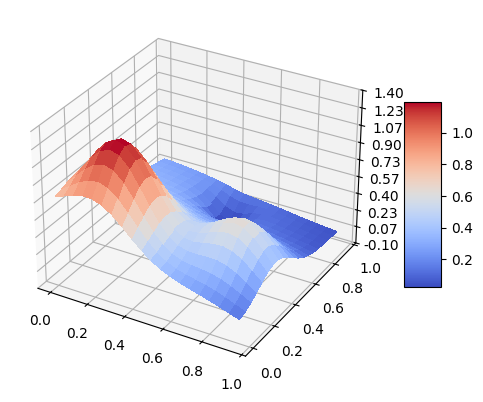

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

If you wish to compare your results with other on the Franke function or other popular functions tested with linear regression, see the list in Figure 1 of the article by Cook et al at <https://arxiv.org/abs/2401.11694>.

### Part a) : Ordinary Least Square (OLS) on the Franke function

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ and $y$ up to fifth order.

Evaluate the mean Squared error (MSE)

$$
MSE(\boldsymbol{y},\tilde{\boldsymbol{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\boldsymbol{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Plot the resulting scores (MSE and $R^2$) as functions of the polynomial degree (here up to polymial degree five).
Plot also the parameters $\beta$ as you increase the order of the polynomial. Comment your results.

Your code has to include a scaling/centering of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.

You can easily reuse the solutions to your exercises from week 35 and week 36.
See also the lecture slides from week 35 and week 36.

On scaling, we recommend reading the following section from the scikit-learn software description, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section>.

### Part b): Adding Ridge regression for  the Franke function

Write your own code for the Ridge method, either using matrix
inversion or the singular value decomposition as done in the previous
exercise. The lecture notes from week 35 and 36 contain more information. Furthermore, the numerical exercise from week 36 is something you can reuse here.

Perform the same analysis as you did in the previous exercise but now for different values of $\lambda$. Compare and
analyze your results with those obtained in part a) with the ordinary least squares method. Study the
dependence on $\lambda$.

In [2]:
# first we need to add some noise to our function as request from the exercise

np.random.seed(2745)
n = 100
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + 0.01 * np.random.normal(0, 1, n) # we add noise distributed as N(0, 1) to the Franke function
                                                            # however to test our model we reduce noise to the minimum (weight = 0.01)

In [3]:
# defining a function to create the design matrix

def design_matrix(x, y, degree):
    N = len(x) # the number of rows is going to be equal to the number of observations (100 in our case)
    l = int((degree + 1) * (degree + 2) / 2)  # that's how we calculate the number of columns when dealing with polynomial features
    X = np.ones((N, l)) # we use a matrix of ones as our starting point
    idx = 1
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X[:, idx] = (x**(i-j)) * (y**j)
            idx += 1
    return X

# Create the design matrix for a fifth-degree polynomial
p = 5
X_manual = design_matrix(x, y, p)
X_manual.shape, y.shape

((100, 21), (100,))

### Splitting the dataset at hand

Before applying the scaler to our dataset, it's important to split it into training and test sets. The reason is that we will fit the scaler using only the training data to ensure that no information from the test data leaks into the scaling process. Once the scaler is fitted to the training data, we will apply the same transformation to both the training and test data.

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_manual, z, test_size=0.2, random_state=42) # We put a random seed in the splitting process for reproducibility

In [5]:
y_train.shape, y_test.shape

((80,), (20,))

### Scaling the dataset at hand

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) # We do NOT fit again the testing data!

scaler_y = StandardScaler()
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# To avoid singularity problems with the feature matrix after scaling it
# we replace all scaled values of the first column with 1 (our intercept).
# for i in range(X_train_scaled.shape[0]):
#     X_train_scaled[i][0] = 1

# for i in range(X_test_scaled.shape[0]):
#     X_test_scaled[i][0] = 1

### Applying the Ridge regression

$$
\boldsymbol{\beta}_{\text{Ridge}} = \left( \mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T \mathbf{y}
$$

In [7]:
from sklearn.linear_model import Ridge

# MSE Calculator Function
def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data - y_model) ** 2)/n

# R2 Calculator Function
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

# Identity matrix based on the number of features
n_features = X_train_scaled.shape[1]  # Number of features (columns) in X_train_scaled
I = np.eye(n_features, n_features)    # Identity matrix should match the number of features

nlambdas = 40
lambdas = np.logspace(-10, 10, nlambdas) # This generates nlambdas (20 in this case) evenly spaced,
                                       # starting from a minimum point of 10^(-10) and with a maximum point of 10^10

# MSE
manual_MSEtrain = np.zeros(nlambdas)
manual_MSEpredict = np.zeros(nlambdas)
sklearn_MSEtrain = np.zeros(nlambdas)
sklearn_MSEpredict = np.zeros(nlambdas)

# R2
sklearn_R2train = np.zeros(nlambdas)
sklearn_R2predict = np.zeros(nlambdas)

# Changing dimensionality of y_train
# y_train = y_train.reshape(-1, 1)  # Reshape y_train to (80, 1) for matrix multiplication

for i in range(nlambdas):
    lmb = lambdas[i] 
    # ---------------------------------- Manually applying Ridge regression and calculating the error ----------------------------------
    # beta_ridge = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lmb*I) @ X_train_scaled @ y_train
    # ytilde_ridge = X_train_scaled @ beta_ridge
    # ypredict_ridge = X_test_scaled @ beta_ridge

    # manual_MSEtrain[i] = MSE(y_train, ytilde_ridge)
    # manual_MSEpredict[i] = MSE(y_test, ypredict_ridge)
    
    # ------------------------------ Using Scikit-Learn to apply Ridge regression and calculate the error ------------------------------ 
    ridge_regression = Ridge(lmb, fit_intercept=False)
    # We fit the Ridge regression model using the train data
    ridge_regression.fit(X_train_scaled, y_train_scaled)

    # Predict on training data
    sklearn_ytilde_ridge = ridge_regression.predict(X_train_scaled)
    # Calculate MSE on training data
    sklearn_MSEtrain[i] = MSE(y_train_scaled, sklearn_ytilde_ridge)
    # Calculate R2 on training data
    sklearn_R2train[i] = R2(y_train_scaled, sklearn_ytilde_ridge)
    
    # Predict on test data
    sklearn_ypredict_ridge = ridge_regression.predict(X_test_scaled)
    # Calculate MSE on test data
    sklearn_MSEpredict[i] = MSE(y_test_scaled, sklearn_ypredict_ridge)
    # Calculate R2 on test data
    sklearn_R2predict[i] = R2(y_test_scaled, sklearn_ypredict_ridge)

print('MSE for train data:', sklearn_MSEtrain)
print('-'*40)
print('MSE for test data:', sklearn_MSEpredict)
print('-'*40)
print('R2 for train data:', sklearn_R2train)
print('-'*40)
print('R2 for test data:', sklearn_R2predict)

MSE for train data: [0.01056213 0.01056213 0.01056213 0.01056213 0.01056213 0.01056215
 0.01056235 0.01056442 0.010585   0.01076402 0.01186944 0.01552441
 0.02164076 0.02765794 0.03153348 0.03434685 0.0387968  0.04547924
 0.05503378 0.07875105 0.12830412 0.18987942 0.25373126 0.34006209
 0.43379223 0.54472923 0.71751314 0.87618489 0.95646943 0.98602138
 0.99564713 0.99865769 0.99958732 0.99987324 0.99996108 0.99998805
 0.99999633 0.99999887 0.99999965 0.99999989]
----------------------------------------
MSE for test data: [0.10278799 0.10278767 0.10278662 0.1027832  0.1027721  0.10273604
 0.10261974 0.10225292 0.10117708 0.09870134 0.09673508 0.10546811
 0.12941541 0.15309805 0.16871721 0.18441803 0.201107   0.21245345
 0.22737519 0.26653822 0.33915492 0.42743371 0.53916718 0.7104793
 0.91226109 1.14407503 1.42192924 1.63650762 1.7376554  1.77398874
 1.78573127 1.78939496 1.79052543 1.79087304 1.79097982 1.79101261
 1.79102267 1.79102577 1.79102671 1.79102701]
-------------------------

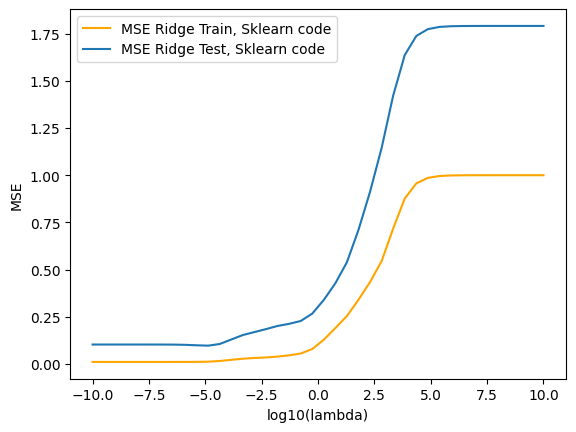

In [8]:
# Plot MSE
plt.figure()
plt.plot(np.log10(lambdas), sklearn_MSEtrain, label='MSE Ridge Train, Sklearn code', color='orange')
plt.plot(np.log10(lambdas), sklearn_MSEpredict, label='MSE Ridge Test, Sklearn code')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

**Considerations on the MSE graph**

From the graph above it is clear that higher values of lambda lead to underfitting (from $10^{-5}$ we can clearly see this phenomenon). This means that the bigger biases introduced into the model make it inappropriate for the problem at hand.

On the other hand, low values of lambda appear to respond extremely well, by generating a very low MSE (practically 0 for the training set). This already indicates us that the most adequate model for this particular problem could be represented by the simple OLS regression. 

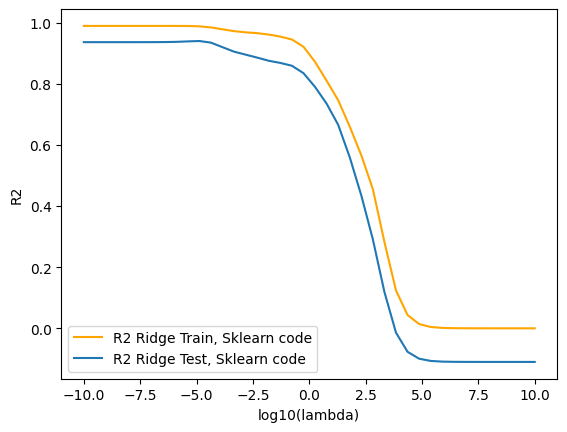

In [9]:
# Plot R2
plt.figure()
plt.plot(np.log10(lambdas), sklearn_R2train, label='R2 Ridge Train, Sklearn code', color='orange')
plt.plot(np.log10(lambdas), sklearn_R2predict, label='R2 Ridge Test, Sklearn code')
plt.xlabel('log10(lambda)')
plt.ylabel('R2')
plt.legend()
plt.show()

**Considerations on the R2 graph**

Similarly to what we already noticed for the MSE graph, the R2 graph shows us that higher values of lambda strongly decrease the capacity of the model to explain the variance of the data. In this case, we can start noticing this phenomenon starting from values of lambda equal to $10^0$. Again, this indicates us that small lambda values are the most adequate for the problem at hand. 

### Optimizing lambda parameters

In order to find the best lambda parameter to use in our Ridge regression we are going to use both *Cross-Validation* and *Grid Search*:

- **Cross-Validation**: It allows us to divide the training set in $k$-folds, where each time one of these $k$-folds represents the validation set. We then calculate the error for each of these different validations sets, and by computing the average error we evaluate how well that particular lambda parameter behaved.
- **Grid Search**: It allows us to apply the Cross-Validation technique for each value of lambda. By confronting the different obtained average errors we can then choose the best lambda parameter.

Using the Scikit-Learn library we can apply both Cross-Validation and Grid Search to our training dataset, by simply using the `GridSearchCV` tool.

In [10]:
from sklearn.model_selection import GridSearchCV

# We create a dictionary, because the GridSearchCV expects a dictionary as the grid parameter
grid_parameter = {'alpha': lambdas} # alpha corresponds to lambda in Ridge for scikit-learn

ridge_model = Ridge(fit_intercept=False)

# Let's apply both the Grid Search and the Cross-Validation (cv=5 --> k = 5)
grid_search_cv = GridSearchCV(ridge_model, grid_parameter, cv=5, scoring='neg_mean_squared_error') # VERY IMPORTANT:
                                                                                                   # We specified the parameter scoring='neg_mean_squared_error',
                                                                                                   # because GridSearchCV tries to maximize the score by default.
                                                                                                   # However, MSE is a minimization metric --> the lower the MSE, the better the model.
                                                                                                   # By considering the negative MSE values, GridSearchCV will be able to actually identify the best MSE.
# We fit grid_search_cv to out training data
grid_search_cv.fit(X_train_scaled, y_train_scaled)

# Finally, we are able to extrapolate the best lambda
best_lambda = grid_search_cv.best_params_['alpha']
print(f"Best lambda for Ridge regression: {best_lambda}")


Best lambda for Ridge regression: 1.2663801734674021e-06


**Considerations on the best lambda obtained**

The above result is definitely not surprising: we already saw from the MSE and R2 plots that the best lambda values were those associated with very low values. In this case, the best lambda value appears to be practically $0$. Such a small value clearly tells us that the best regression model is the OLS one (when $\lambda \rightarrow 0$, then $\beta_{\textit{Ridge}} \rightarrow \beta_{\textit{OLS}}$).

In [11]:
# Now, apply the best model to the test data
best_model = grid_search_cv.best_estimator_
y_test_predict = best_model.predict(X_test_scaled)

# Calculate the final MSE and R2 on the test data
final_MSE = MSE(y_test_scaled, y_test_predict)
final_R2 = R2(y_test_scaled, y_test_predict)

print(f"Final Test MSE: {final_MSE}")
print(f"Final Test R2: {final_R2}")

Final Test MSE: 0.10117707812981655
Final Test R2: 0.9372965503535069


### Analyzing the noise impact on our model

So far, the impact of noise on the analyzed Franke function has been very small (equal to $0.01$). This means that the intrinsic randomness of the data we had to predict was intentionally kept to a minimum. For a more complete analysis, we will now analyze the impact of different noise weights on our predictive model. We can already imagine that a higher level of noise will inevitably have a negative impact on our model by reducing its accuracy.

Analyzing model with noise level: 0.01
Best lambda for noise level 0.01: 1.2663801734674021e-06
Final Test MSE for noise level 0.01: 0.09685776485092176
Final Test R2 for noise level 0.01: 0.9393296899448971
________________________________________
Analyzing model with noise level: 0.05
Best lambda for noise level 0.05: 1.3433993325988988e-05
Final Test MSE for noise level 0.05: 0.17895120959438435
Final Test R2 for noise level 0.05: 0.8950180583826628
________________________________________
Analyzing model with noise level: 0.1
Best lambda for noise level 0.1: 0.05223345074266832
Final Test MSE for noise level 0.1: 0.29340396016853765
Final Test R2 for noise level 0.1: 0.8303960341663104
________________________________________
Analyzing model with noise level: 0.5
Best lambda for noise level 0.5: 0.5541020330009481
Final Test MSE for noise level 0.5: 1.1461916967124977
Final Test R2 for noise level 0.5: 0.21646167012893813
________________________________________
Analyzing model wit

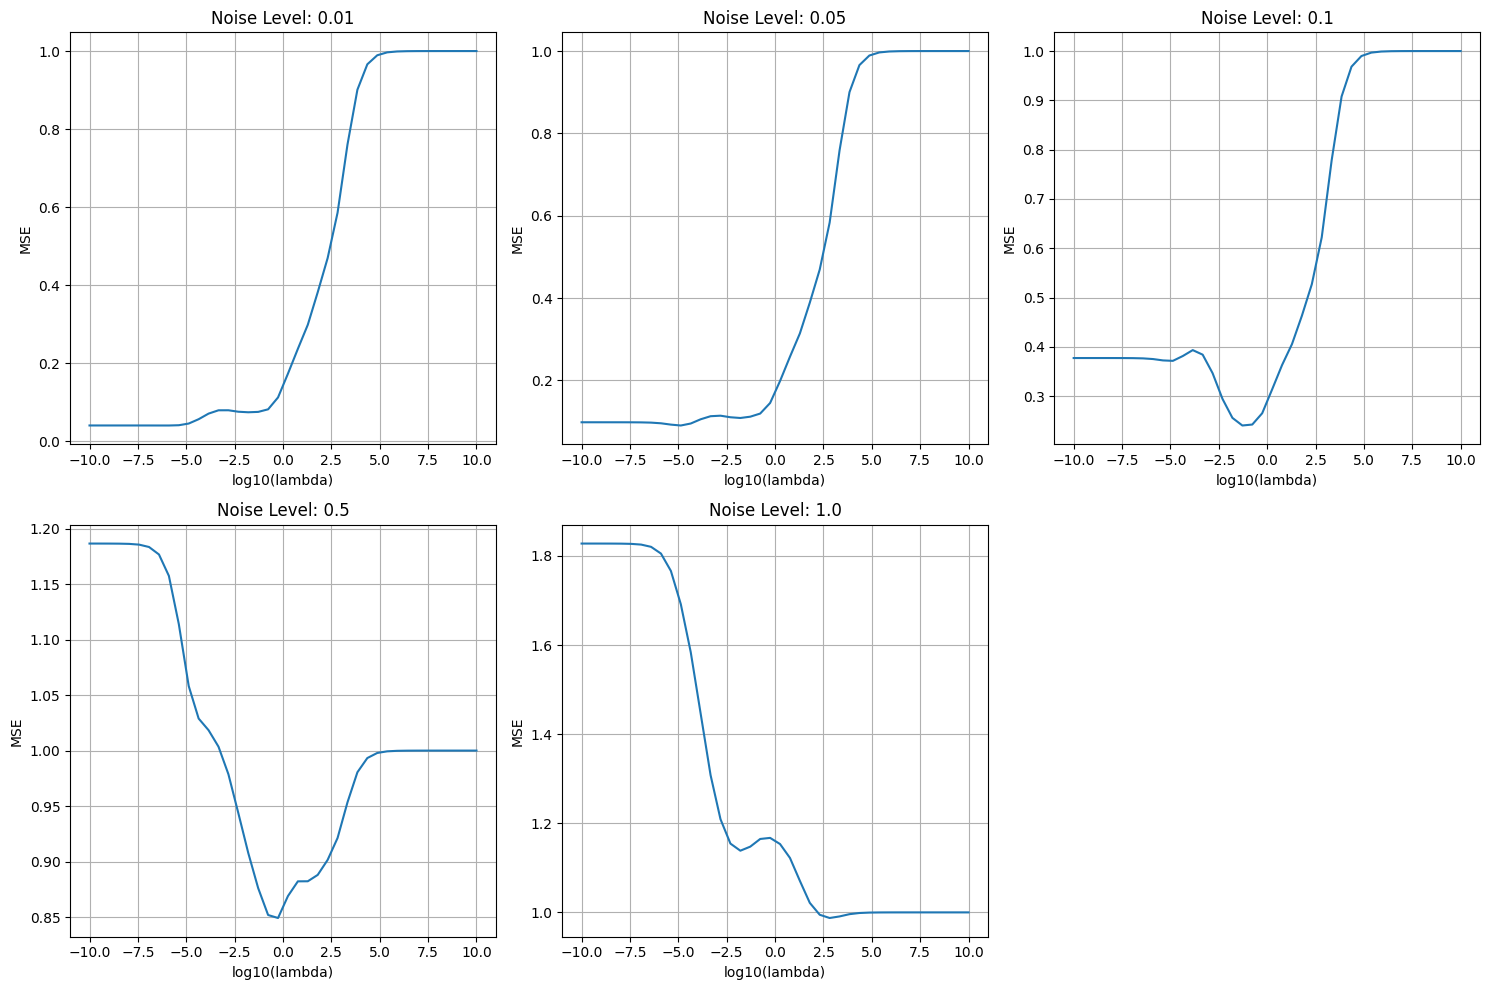

In [12]:
import math
import matplotlib.pyplot as plt

# We define a list of different noise levels to analyze
noise_levels = [0.01, 0.05, 0.1, 0.5, 1.0]  # We can add more noise levels
                                            # The subplots grid is going to adapt automatically to them

# AUTOMATIC SUBPLOTS GRID GENERATION
n_noise_levels = len(noise_levels)
# Number of columns
n_cols = 3  # Always 3 columns
# Number of rows
n_rows = math.ceil(n_noise_levels / n_cols)  # Calculate rows based on the number of noise levels

# Create subplots with the dynamic number of rows and 3 columns
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figure size based on rows

for i, noise in enumerate(noise_levels):
    print(f"Analyzing model with noise level: {noise}")
    
    # Add noise to the Franke function
    z_noisy = FrankeFunction(x, y) + noise * np.random.normal(0, 1, n)

    # Recreate the design matrix (p=5 for 5th-degree polynomial)
    X_manual = design_matrix(x, y, p)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_manual, z_noisy, test_size=0.2, random_state=42)
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Scale target
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))
    
    # Run grid search for Ridge regression
    grid_search = GridSearchCV(Ridge(fit_intercept=False), {'alpha': lambdas}, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Get the best lambda
    best_lambda = grid_search.best_params_['alpha']
    print(f"Best lambda for noise level {noise}: {best_lambda}")

    # Test the model on test data
    best_model = grid_search.best_estimator_
    y_test_predict = best_model.predict(X_test_scaled)

    # Calculate final MSE and R2
    final_MSE = MSE(y_test_scaled, y_test_predict)
    final_R2 = R2(y_test_scaled, y_test_predict)
    print(f"Final Test MSE for noise level {noise}: {final_MSE}")
    print(f"Final Test R2 for noise level {noise}: {final_R2}")
    print('_'*40)
    
    # Plot in the corresponding subplot
    ax = axs[i // n_cols, i % n_cols]  # Calculate position in grid
    ax.plot(np.log10(lambdas), grid_search.cv_results_['mean_test_score'] * -1)
    ax.set_xlabel('log10(lambda)') # for better data visualization
    ax.set_ylabel('MSE')
    ax.set_title(f'Noise Level: {noise}')
    ax.grid(True)

# Remove empty subplots (if any)
if n_noise_levels % n_cols != 0:
    for j in range(n_noise_levels, n_rows * n_cols):
        fig.delaxes(axs.flat[j])

plt.tight_layout()
plt.show()

**Considerations about the impact of noise on our model**

- **Low noise**: With low noise, the model does not require much regularization, and small lambda values (closer to OLS) perform best. This is not a surprising result to us, since we have already analyzed the best lambda parameter for a very low noise impact (equal to $0.01$), and the best lambda was practically $0$. 

- **High noise**: With higher noise, moderate regularization helps the model generalize better by preventing overfitting to the noise. A balance between too much and too little regularization (moderate lambda values) minimizes the MSE.

Analyzing model with noise level: 0.01
Analyzing model with noise level: 0.05
Analyzing model with noise level: 0.1
Analyzing model with noise level: 0.5
Analyzing model with noise level: 1.0


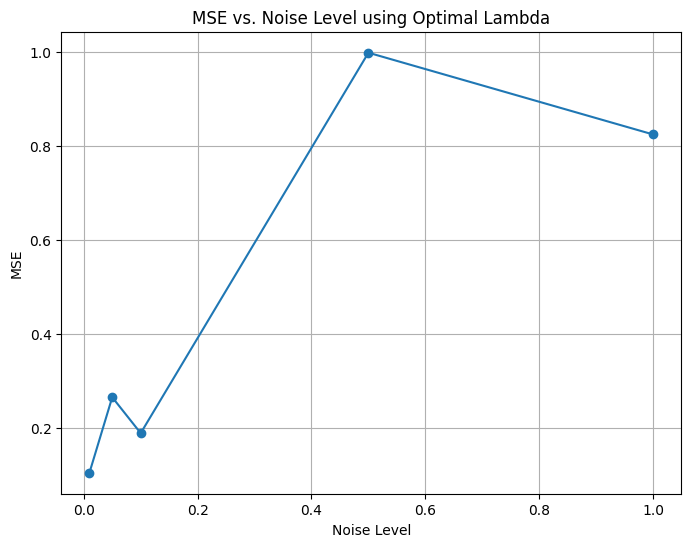

In [13]:
# List of noise levels
noise_levels = [0.01, 0.05, 0.1, 0.5, 1.0]

# Arrays to store the MSE for each noise level
best_MSEs = []

for noise in noise_levels:
    print(f"Analyzing model with noise level: {noise}")
    
    # Add noise to the Franke function
    z_noisy = FrankeFunction(x, y) + noise * np.random.normal(0, 1, n)

    # Recreate the design matrix (p=5 for 5th-degree polynomial)
    X_manual = design_matrix(x, y, p)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_manual, z_noisy, test_size=0.2, random_state=42)
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Scale target
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))
    
    # Run grid search for Ridge regression
    grid_search = GridSearchCV(Ridge(fit_intercept=False), {'alpha': lambdas}, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Test the model on test data and calculate MSE
    y_test_predict = best_model.predict(X_test_scaled)
    final_MSE = MSE(y_test_scaled, y_test_predict)
    
    # Store the MSE for this noise level
    best_MSEs.append(final_MSE)

# Plot noise levels vs. MSE
plt.figure(figsize=(8, 6))
plt.plot(noise_levels, best_MSEs, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('MSE')
plt.title('MSE vs. Noise Level using Optimal Lambda')
plt.grid(True)
plt.show()

**Final Considerations about the impact of noise on our model**

Finally, from the graph above we can clearly demonstrate what we already stated before: higher noise levels result in a worse overall performance for our model (increased MSE).

### Part c): Adding Lasso for the Franke function

This exercise is essentially a repeat of the previous two ones, but now
with Lasso regression. Write either your own code (difficult and optional) or, in this case,
you can also use the functionalities of **Scikit-Learn** (recommended). Keep in mind that the library **Scikit-Learn** excludes the intercept by default. 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.

### Part d): Paper and pencil part

This exercise deals with various mean values and variances in  linear regression method (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)). The exercise is also part of the weekly exercises for week 37.

The assumption we have made is 
that there exists a continuous function $f(\boldsymbol{x})$ and  a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$
which describes our data

$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$

We then approximate this function $f(\boldsymbol{x})$ with our model $\boldsymbol{\tilde{y}}$ from the solution of the linear regression equations (ordinary least squares OLS), that is our
function $f$ is approximated by $\boldsymbol{\tilde{y}}$ where we minimized  $(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2$, with

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta}.
$$

The matrix $\boldsymbol{X}$ is the so-called design or feature matrix. 

Show that  the expectation value of $\boldsymbol{y}$ for a given element $i$

$$
\mathbb{E}(y_i)  =\sum_{j}x_{ij} \beta_j=\mathbf{X}_{i, \ast} \, \boldsymbol{\beta},
$$

and that
its variance is

$$
\mbox{Var}(y_i)  = \sigma^2.
$$

Hence, $y_i \sim N( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, that is $\boldsymbol{y}$ follows a normal distribution with 
mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.

With the OLS expressions for the optimal parameters $\boldsymbol{\hat{\beta}}$ show that

$$
\mathbb{E}(\boldsymbol{\hat{\beta}}) = \boldsymbol{\beta}.
$$

Show finally that the variance of $\boldsymbol{\beta}$ is

$$
\mbox{Var}(\boldsymbol{\hat{\beta}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$

We can use the last expression when we define a so-called confidence interval for the parameters $\beta$. 
A given parameter $\beta_j$ is given by the diagonal matrix element of the above matrix.

### Part e): Bias-variance trade-off and resampling techniques

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.
**We will only use the simpler ordinary least squares here**.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

As in part d), we assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

The answer to this exercise should be included in the theory part of the report.  This exercise is also part of the weekly exercises of week 38.
Explain what the terms mean and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

### Part f):  Cross-validation as resampling techniques, adding more complexity

The aim here is to implement another widely popular
resampling technique, the so-called cross-validation method.  

Implement the $k$-fold cross-validation algorithm (write your own
code or use the functionality of **Scikit-Learn**) and evaluate again the MSE function resulting
from the test folds. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  

In addition to using the ordinary least squares method, you should include both Ridge and Lasso regression.

### Part g): Analysis of real data

With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises a-f. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,

Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2023/Project1/DataFiles>

In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

In [12]:
scipy.misc.imread

NameError: name 'scipy' is not defined

Here is a simple part of a Python code which reads and plots the data
from such files

In [3]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

If you should have problems in downloading the digital terrain data,
we provide two examples under the data folder of project 1. One is
from a region close to Stavanger in Norway and the other Møsvatn
Austfjell, again in Norway.
Feel free to produce your own terrain data.

Alternatively, if you would like to use another data set, feel free to do so. This could be data close to your reseach area or simply a data set you found interesting. See for example [kaggle.com](https://www.kaggle.com/datasets) for examples.

Our final part deals with the parameterization of your digital terrain
data (or your own data).  We will apply all three methods for linear regression, the same type (or higher order) of polynomial
approximation and cross-validation as resampling technique to evaluate which
model fits the data best.

At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).

## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis here.

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers. 

  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report.

## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.